In [81]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import cmocean

CMAP = cmocean.cm.balance
CMAP = seaborn.cm.icefire

In [82]:
def energy_specturm(u,v):
    # Script for the computation of 3D spectrum of the Total Kinetic Energy
    # Adapted to the Taylor-Green vortex (TGV) problem.
    # CREATED by FARSHAD NAVAH
    # McGill University
    # farshad.navah .a.t. mail.mcgill.ca
    # 2018
    # provided as is with no garantee.
    # Please cite:
    #    https://github.com/fanav/Energy_Spectrum
    #    https://arxiv.org/abs/1809.03966

    # -----------------------------------------------------------------
    #  IMPORTS - ENVIRONMENT
    # -----------------------------------------------------------------

    import numpy as np
    import matplotlib.pyplot as plt
    import time
    from math import sqrt

    # -----------------------------------------------------------------
    #  TGV QUANTS
    # -----------------------------------------------------------------

    # These quantities are to account for particular non-dimensionalizations of state variables.
    # In general U0=1.
    c  = sqrt(1.4);
    Ma = 0.1;
    U0 = 1.0; 

    #load the ascii file
    data = np.stack((u,v),axis=1)

    print ("shape of data = ",data.shape)

    localtime = time.asctime( time.localtime(time.time()) )
    print ("Reading files...localtime",localtime, "- END\n")

    # -----------------------------------------------------------------
    #  COMPUTATIONS
    # -----------------------------------------------------------------
    localtime = time.asctime( time.localtime(time.time()) )
    print ("Computing spectrum... ",localtime)

    N = data.shape[-1]
    M= data.shape[-2]
    print("N =",N)
    print("M =",M)
    eps = 1e-16 # to void log(0)

    U = data[:,0].mean(axis=0)
    V = data[:,1].mean(axis=0)
    # U = data[:,3].reshape(N,N,N)/U0
    # V = data[:,4].reshape(N,N,N)/U0
    # W = data[:,5].reshape(N,N,N)/U0

    amplsU = abs(np.fft.fftn(U)/U.size)
    amplsV = abs(np.fft.fftn(V)/V.size)
    print(f"amplsU.shape = {amplsU.shape}")
    # amplsW = abs(np.fft.fftn(W)/W.size)

    EK_U  = amplsU**2
    EK_V  = amplsV**2 
    # EK_W  = amplsW**2 

    EK_U = np.fft.fftshift(EK_U)
    EK_V = np.fft.fftshift(EK_V)
    # EK_W = np.fft.fftshift(EK_W)

    sign_sizex = np.shape(EK_U)[0]
    sign_sizey = np.shape(EK_U)[1]
    # sign_sizez = np.shape(EK_U)[2]

    box_sidex = sign_sizex
    box_sidey = sign_sizey
    # box_sidez = sign_sizez

    # box_radius = int(np.ceil((np.sqrt((box_sidex)**2+(box_sidey)**2+(box_sidez)**2))/2.)+1)
    box_radius = int(np.ceil((np.sqrt((box_sidex)**2+(box_sidey)**2))/2.)+1)
    centerx = int(box_sidex/2)
    centery = int(box_sidey/2)
    # centerz = int(box_sidez/2)

    print ("box sidex     =",box_sidex) 
    print ("box sidey     =",box_sidey) 
    # print ("box sidez     =",box_sidez)
    print ("sphere radius =",box_radius )
    print ("centerbox     =",centerx)
    print ("centerboy     =",centery)
    # print ("centerboz     =",centerz,"\n" )
                    
    EK_U_avsphr = np.zeros(box_radius,)+eps ## size of the radius
    EK_V_avsphr = np.zeros(box_radius,)+eps ## size of the radius
    # EK_W_avsphr = np.zeros(box_radius,)+eps ## size of the radius

    # for i in range(box_sidex):
    # 	for j in range(box_sidey):
    # 		for k in range(box_sidez):            
    # 			wn =  int(np.round(np.sqrt((i-centerx)**2+(j-centery)**2+(k-centerz)**2)))
    # 			EK_U_avsphr[wn] = EK_U_avsphr [wn] + EK_U [i,j,k]
    # 			EK_V_avsphr[wn] = EK_V_avsphr [wn] + EK_V [i,j,k]    
    # 			EK_W_avsphr[wn] = EK_W_avsphr [wn] + EK_W [i,j,k]        
    for i in range(box_sidex):
        for j in range(box_sidey):          
            wn =  int(np.round(np.sqrt((i-centerx)**2+(j-centery)**2)))
            EK_U_avsphr[wn] = EK_U_avsphr [wn] + EK_U [i,j]
            EK_V_avsphr[wn] = EK_V_avsphr [wn] + EK_V [i,j]     
    EK_avsphr = 0.5*(EK_U_avsphr + EK_V_avsphr)
                            
    fig = plt.figure()
    plt.title("Kinetic Energy Spectrum")
    plt.xlabel(r"k (wavenumber)")
    plt.ylabel(r"TKE of the k$^{th}$ wavenumber")

    realsize = len(np.fft.rfft(U[:,0]))
    print(realsize)
    plt.loglog(np.arange(0,realsize),((EK_avsphr[0:realsize] )),'k')
    plt.loglog(np.arange(realsize,len(EK_avsphr),1),((EK_avsphr[realsize:] )),'k--')
    axes = plt.gca()
    # axes.set_ylim([10**-25,5**-1])

    print("Real      Kmax    = ",realsize)
    print("Spherical Kmax    = ",len(EK_avsphr))

    TKEofmean_discrete = 0.5*(np.sum(U/U.size)**2+np.sum(V/V.size)**2)
    TKEofmean_sphere   = EK_avsphr[0]

    total_TKE_discrete = np.sum(0.5*(U**2+V**2))/(N*M) # average over whole domaon / divied by total pixel-value
    total_TKE_sphere   = np.sum(EK_avsphr)

    print("the KE  of the mean velocity discrete  = ",TKEofmean_discrete)
    print("the KE  of the mean velocity sphere    = ",TKEofmean_sphere )
    print("the mean KE discrete  = ",total_TKE_discrete)
    print("the mean KE sphere    = ",total_TKE_sphere)

    localtime = time.asctime( time.localtime(time.time()) )
    print ("Computing spectrum... ",localtime, "- END \n")

    # -----------------------------------------------------------------
    #  OUTPUT/PLOTS
    # -----------------------------------------------------------------

    dataout      = np.zeros((box_radius,2)) 
    dataout[:,0] = np.arange(0,len(dataout))
    dataout[:,1] = EK_avsphr[0:len(dataout)]


In [83]:
def get_data_scale(data_name):
    data_info = {"decay_turb":['../../Decay_Turbulence_small/train/Decay_turb_small_128x128_7202.h5', 0.02],
                 "burger2d": ["../../Burgers_2D_small/train/Burgers2D_128x128_702.h5",0.001],
                 "rbc": ["../../RBC_small/train/RBC_small_165_s2.h5",0.01]}
    f = h5py.File(data_info[data_name][0],'r')
    w = f['tasks']['vorticity'][()] if data_name != "burger2d" else None
    u = f['tasks']['u'][()]
    v = f['tasks']['v'][()]
    print(f"************{data_name}************")
    print(f"max w: {np.max(w):.2f}, min w: {np.min(w):.2f}") if data_name != "burger2d" else None
    print(f"mean w: {np.mean(w):4f}, std w: {np.std(w):.4f}") if data_name != "burger2d" else None
    print(f"max u: {np.max(u):.4f}, min u: {np.min(u):.4f}")
    print(f"mean u: {np.mean(u):.4f}, std u: {np.std(u):.4f}")
    print(f"max v: {np.max(v):.4f}, min v: {np.min(v):.4f}")
    print(f"mean v: {np.mean(v):.4f}, std v: {np.std(v):.4f}")
    return None

get_data_scale("decay_turb")
get_data_scale("burger2d")
get_data_scale("rbc")

************decay_turb************
max w: 7.82, min w: -5.72
mean w: -0.000029, std w: 1.1907
max u: 1.5468, min u: -1.4452
mean u: -0.0000, std u: 0.4451
max v: 1.9174, min v: -1.4077
mean v: 0.0000, std v: 0.4559
************burger2d************
max u: 2.7903, min u: -1.2097
mean u: 0.8246, std u: 0.2483
max v: 1.6623, min v: -2.1578
mean v: -0.3140, std v: 0.3626
************rbc************
max w: 33.45, min w: -33.47
mean w: -0.033876, std w: 4.5677
max u: 0.6425, min u: -0.5935
mean u: -0.0007, std u: 0.1942
max v: 0.7396, min v: -0.6896
mean v: 0.0000, std v: 0.1997


# Data Visualization

In [84]:

import h5py
def plot_data(data_name = "burger2d",row=10,col=10,timescale_factor =10 ,in_channel=2,vmin=-1,vmax=1):

    data_info = {"decay_turb":['../../Decay_Turbulence_small/train/Decay_turb_small_128x128_7202.h5', 0.02],
                 "burger2d": ["../../Burgers_2D_small/train/Burgers2D_128x128_702.h5",0.001],
                 "rbc": ["../../RBC_small/train/RBC_small_165_s2.h5",0.01]}
    f = h5py.File(data_info[data_name][0],'r')
    if data_name == "rbc":
        print(f['scales/sim_time'][()])
        t = int(f['scales/sim_time'][0])
    else:
        print(f['tasks']['t'][()])
        t = np.ceil(f['tasks']['t'][0])
    print(f['tasks']['u'].shape)
    if data_name == "burger2d" and in_channel ==1:
        raise ValueError("Burger2D doesnt have vorticity channel")
    else:
        if in_channel == 1:
            w = f['tasks']['vorticity'][()]
            fig,axs = plt.subplots(row,col,figsize=(20,20))
            i = 0
            for ax in axs:
                for a in ax:
                    a.axis('off')
                    a.imshow(w[i*timescale_factor],cmap=CMAP,vmin=vmin,vmax=vmax)
                    a.set_title(f"t={t + i*timescale_factor*data_info[data_name][1]:.4}")
                    i+=1
        elif in_channel == 2:
            u = f['tasks']['u'][()]
            v = f['tasks']['v'][()]
            fig,axs = plt.subplots(row,col,figsize=(20,20))
            i = 0
            for ax in axs:
                for a in ax:
                    a.axis('off')
                    a.imshow(u[i*timescale_factor],cmap=CMAP,vmin=vmin[0],vmax=vmax[0])
                    a.set_title(f"t={t + i*timescale_factor*data_info[data_name][1]:.4}")
                    i+=1

            fig,axs = plt.subplots(row,col,figsize=(20,20))
            i = 0
            for ax in axs:
                for a in ax:
                    a.axis('off')
                    a.imshow(v[i*timescale_factor],cmap=CMAP,vmin=vmin[1],vmax=vmax[1])
                    a.set_title(f"t={t + i*timescale_factor*data_info[data_name][1]:.4}")
                    i+=1
        elif in_channel == 3:
            u = f['tasks']['u'][()]
            v = f['tasks']['v'][()]
            w = f['tasks']['vorticity'][()]
            fig,axs = plt.subplots(row,col,figsize=(20,20))
            i = 0
            for ax in axs:
                for a in ax:
                    a.axis('off')
                    a.imshow(u[i*timescale_factor],cmap=CMAP,vmin=vmin[0],vmax=vmax[0])
                    a.set_title(f"t={t + i*timescale_factor*data_info[data_name][1]:.4}")
                    i+=1

            fig,axs = plt.subplots(row,col,figsize=(20,20))
            i = 0
            for ax in axs:
                for a in ax:
                    a.axis('off')
                    a.imshow(v[i*timescale_factor],cmap=CMAP,vmin=vmin[1],vmax=vmax[1])
                    a.set_title(f"t={t + i*timescale_factor*data_info[data_name][1]:.4}")
                    i+=1
            fig,axs = plt.subplots(row,col,figsize=(20,20))
            i = 0
            for ax in axs:
                for a in ax:
                    a.axis('off')
                    a.imshow(w[i*timescale_factor],cmap=CMAP,vmin=vmin[2],vmax=vmax[2])
                    a.set_title(f"t={t + i*timescale_factor*data_info[data_name][1]:.4}")
                    i+=1
    return print("visualization done")


## RBC

************rbc************
max w: 33.45, min w: -33.47
mean w: -0.033876, std w: 4.5677
max u: 0.6425, min u: -0.5935
mean u: -0.0007, std u: 0.1942
max v: 0.7396, min v: -0.6896
mean v: 0.0000, std v: 0.1997
[20.00040028 20.01040028 20.02040028 ... 39.97449828 39.98443195
 39.99436562]
(2000, 256, 64)
visualization done


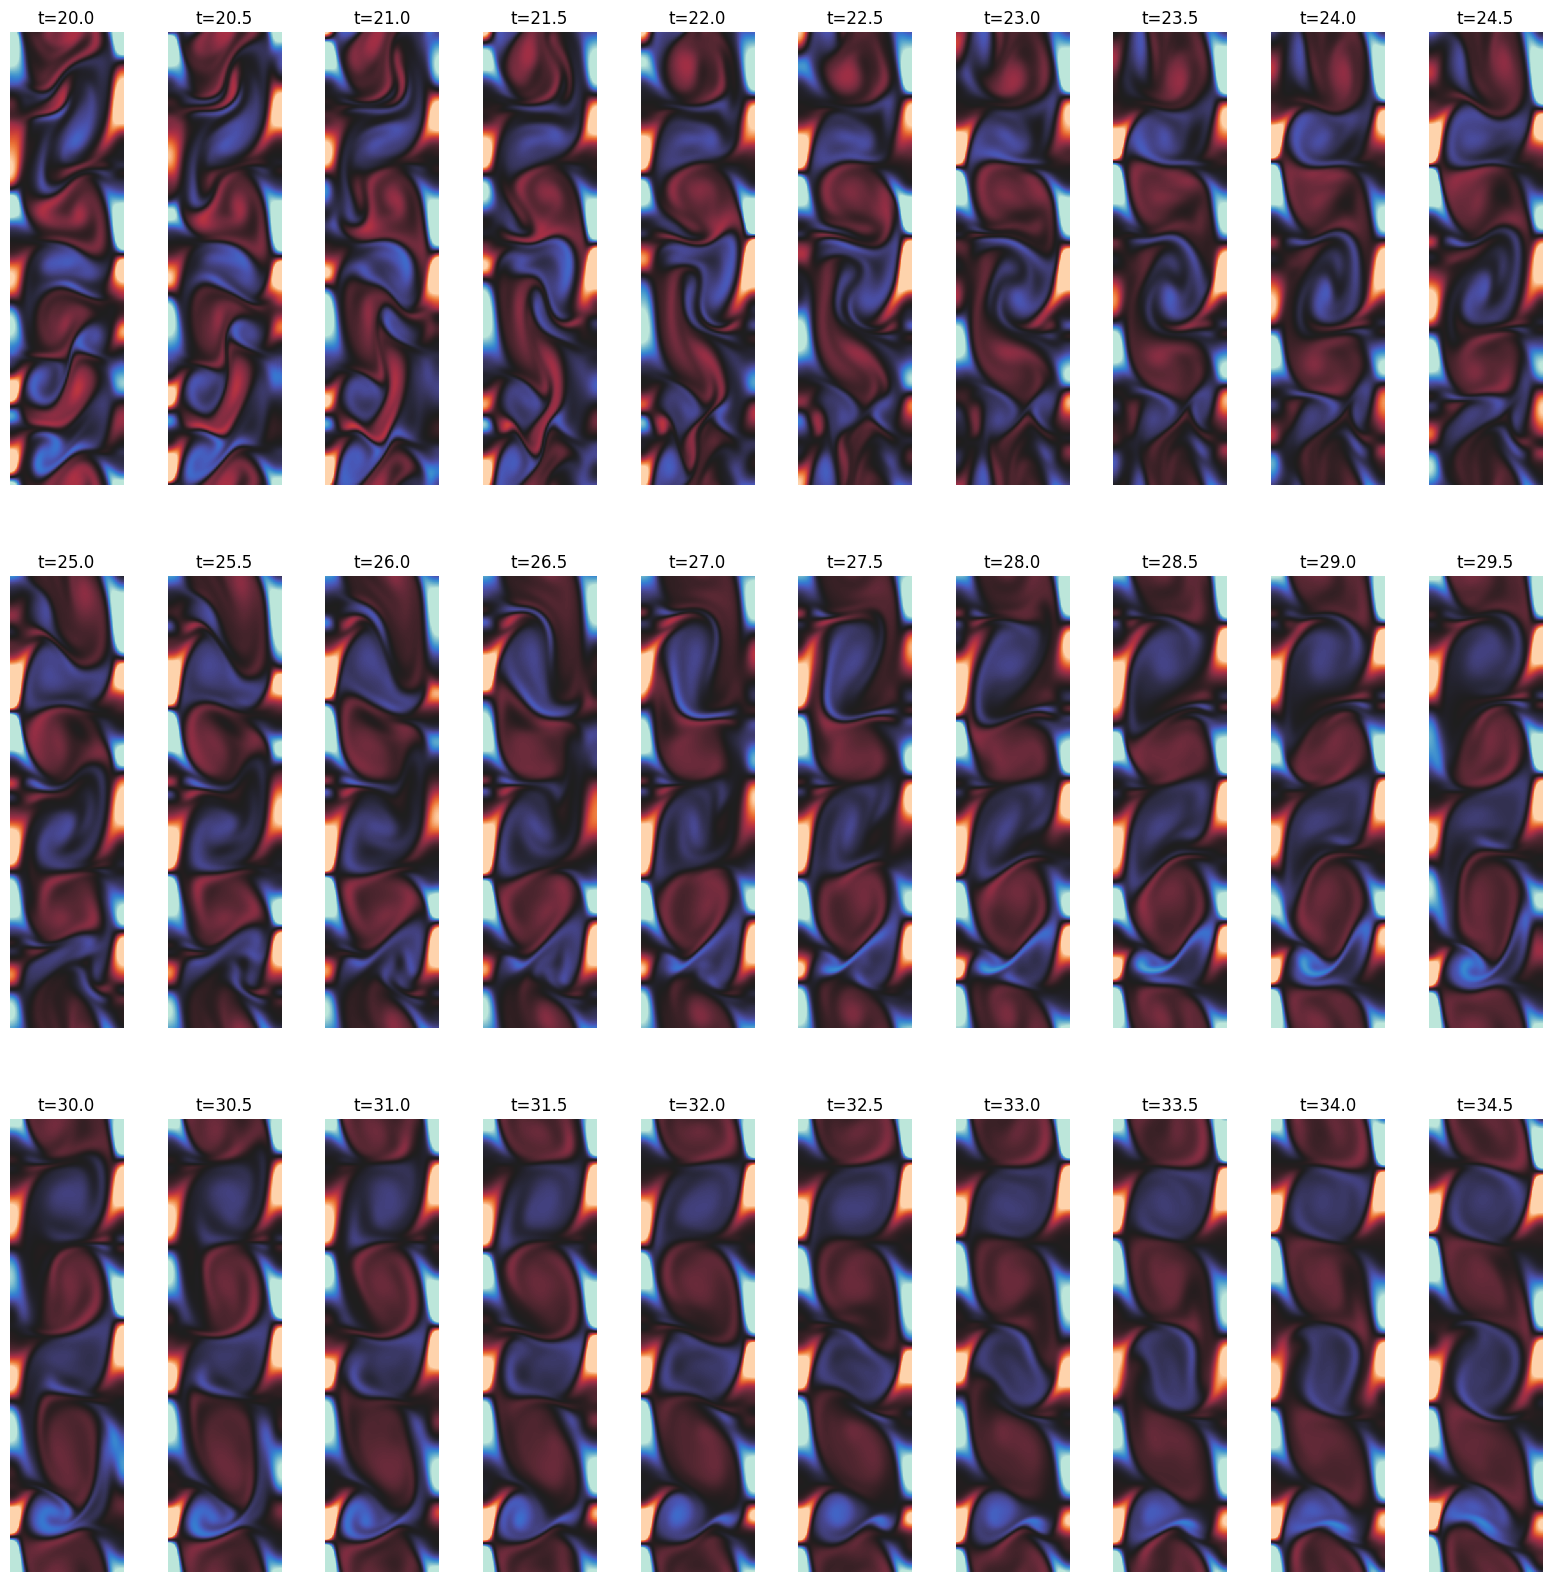

In [85]:
get_data_scale("rbc")
plot_data(data_name = "rbc",timescale_factor =50 ,in_channel=1,vmin=-10,vmax=10,row=3,col=10)

# Burgers

************burger2d************
max u: 2.7903, min u: -1.2097
mean u: 0.8246, std u: 0.2483
max v: 1.6623, min v: -2.1578
mean v: -0.3140, std v: 0.3626
[0.00000000e+00 9.99000999e-04 1.99800200e-03 ... 9.98001998e-01
 9.99000999e-01 1.00000000e+00]
(1001, 128, 128)
visualization done


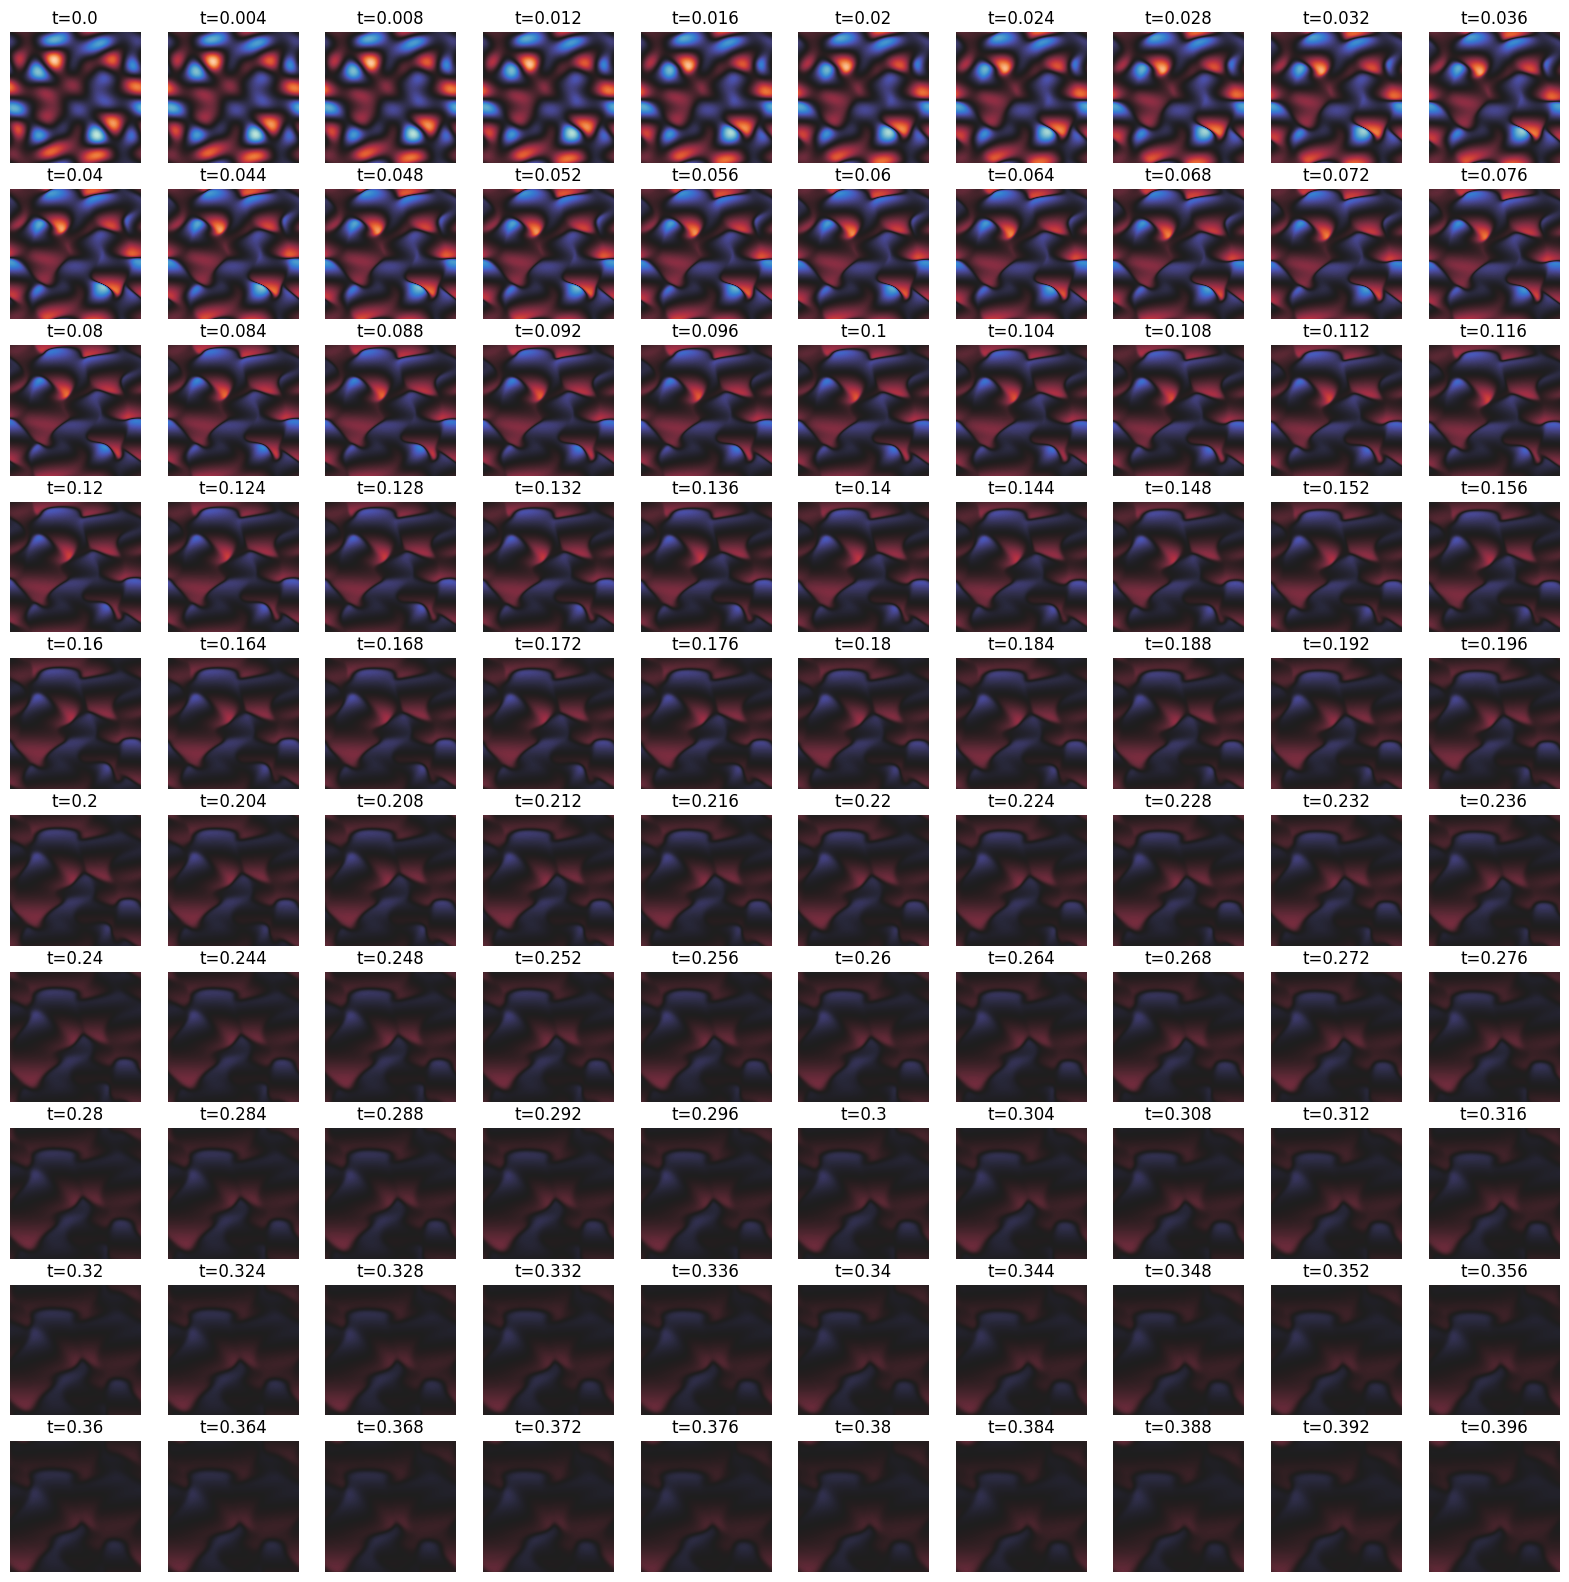

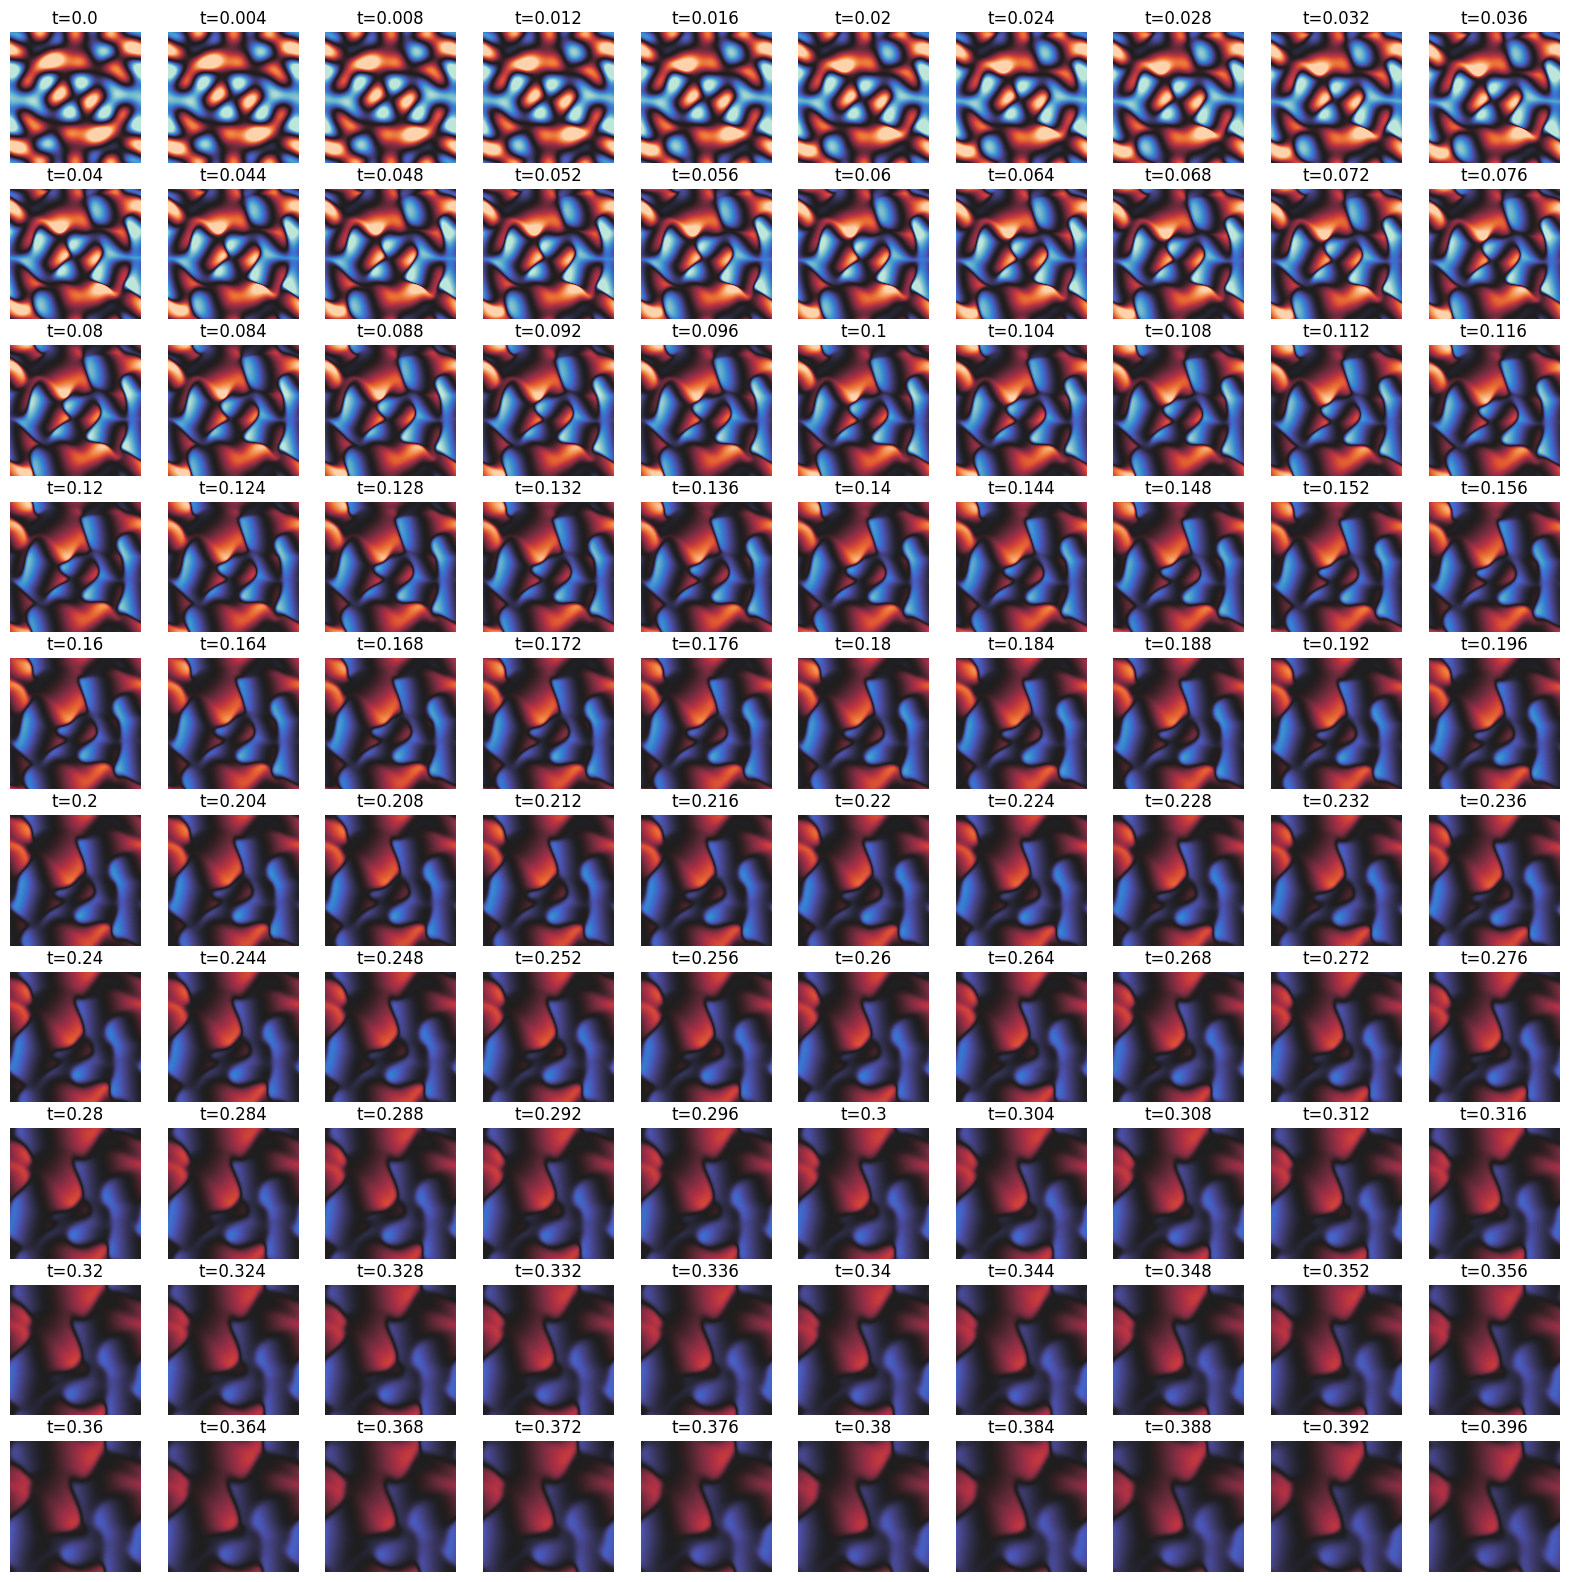

In [86]:
get_data_scale("burger2d")
plot_data(data_name = "burger2d",timescale_factor =4 ,in_channel=2,vmin=[-1.2,-1.6],vmax=[2.8,1],row=10,col=10)

************decay_turb************
max w: 7.82, min w: -5.72
mean w: -0.000029, std w: 1.1907
max u: 1.5468, min u: -1.4452
mean u: -0.0000, std u: 0.4451
max v: 1.9174, min v: -1.4077
mean v: 0.0000, std v: 0.4559
[ 4.90873852  4.92101037  4.93328221 ... 29.41561559 29.42788743
 29.44015928]
(2000, 128, 128)
visualization done


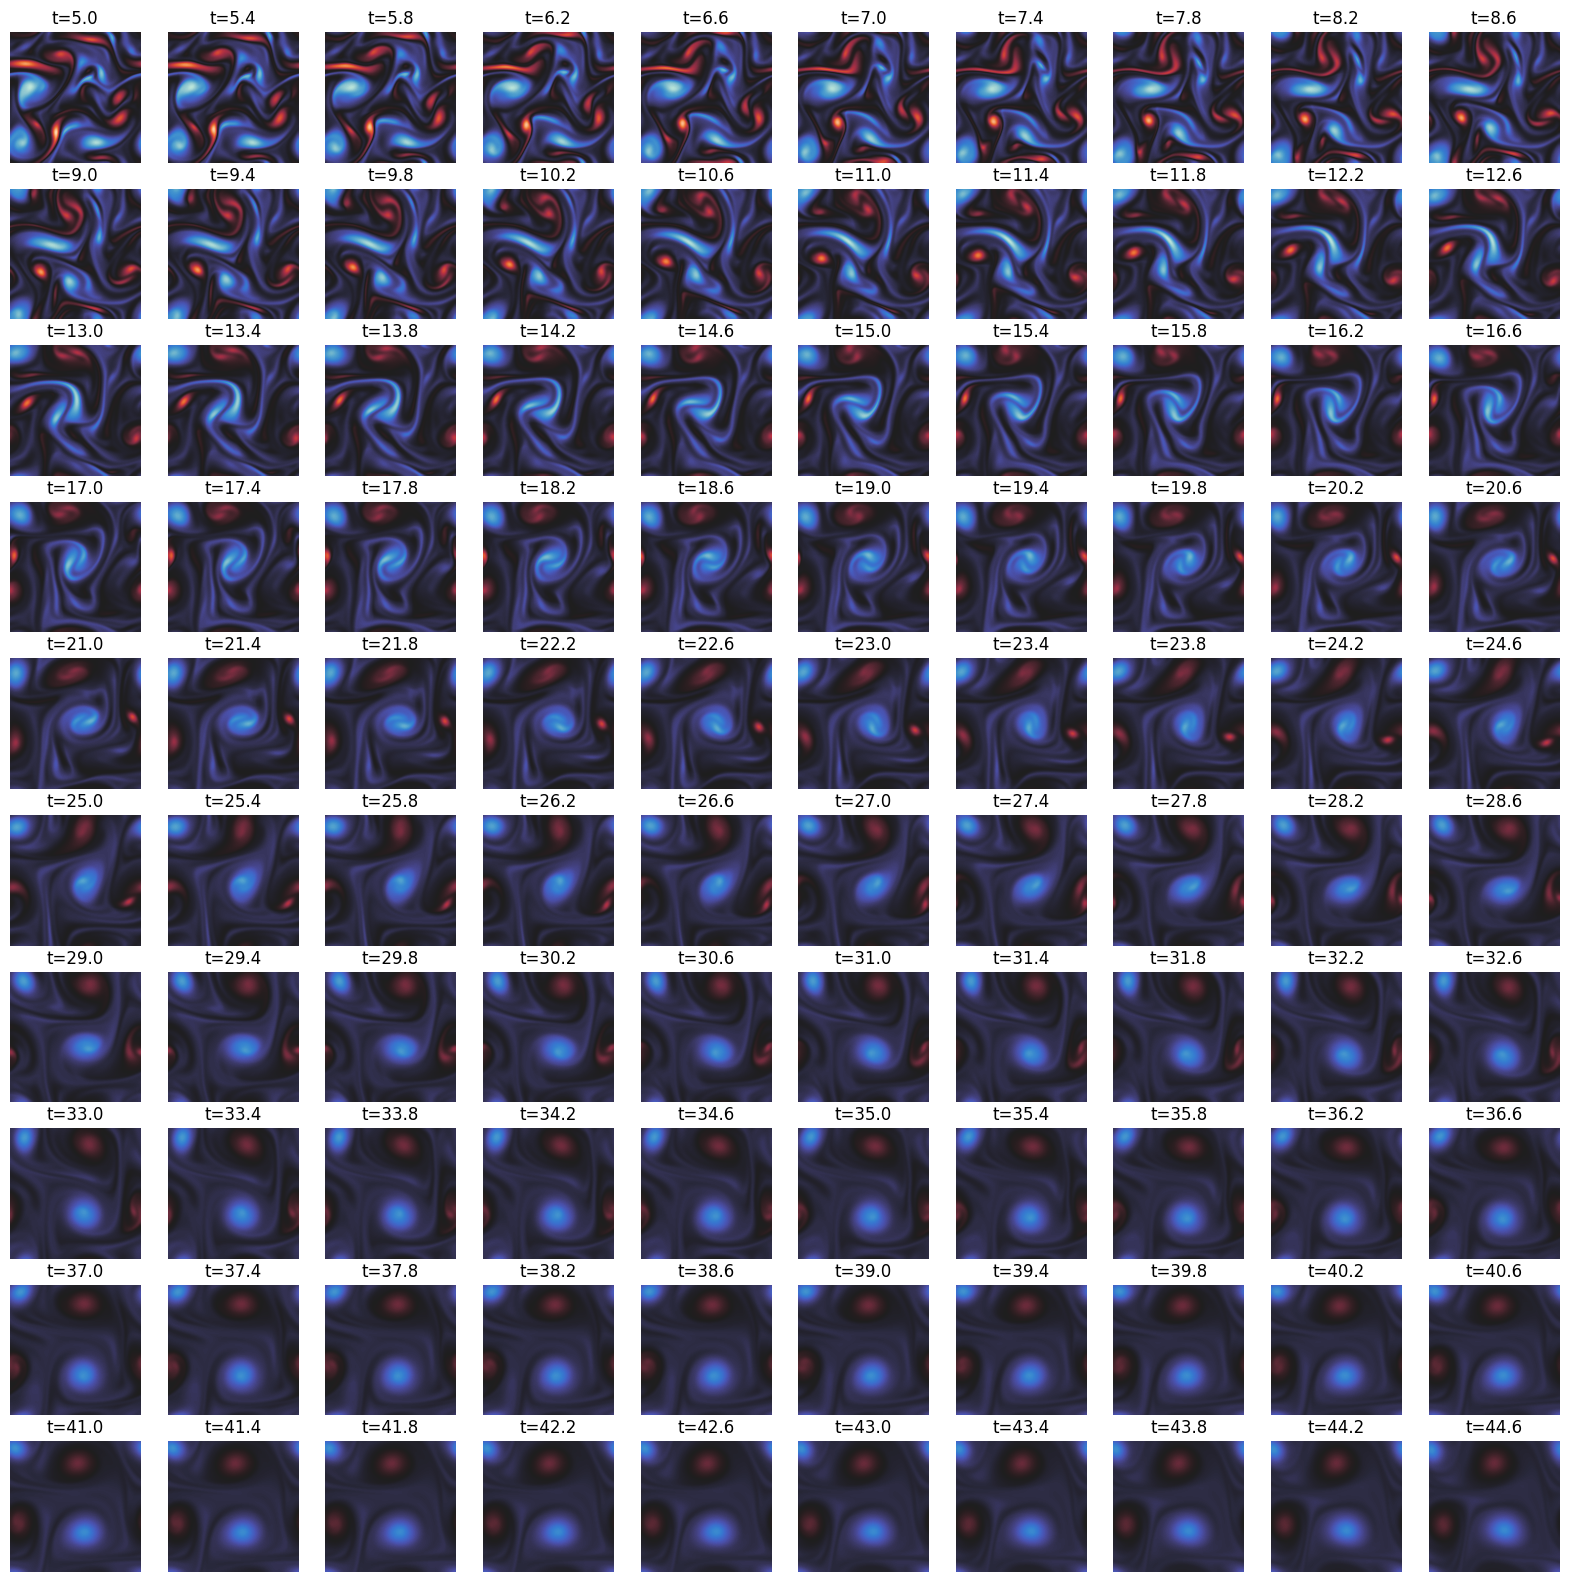

In [87]:
get_data_scale("decay_turb")
plot_data(data_name = "decay_turb",timescale_factor =20 ,in_channel=1,vmin=-5.7,vmax=7.82,row=10,col=10)

# Energy Specturm

shape of data =  (2000, 2, 256, 64)
Reading files...localtime Sun Sep  3 20:30:31 2023 - END

Computing spectrum...  Sun Sep  3 20:30:31 2023
N = 64
M = 256
amplsU.shape = (256, 64)
box sidex     = 256
box sidey     = 64
sphere radius = 133
centerbox     = 128
centerboy     = 32
129
Real      Kmax    =  129
Spherical Kmax    =  133
the KE  of the mean velocity discrete  =  2.2113089363783053e-07
the KE  of the mean velocity sphere    =  2.2113089373783077e-07
the mean KE discrete  =  0.029668013757058
the mean KE sphere    =  0.029668013757071305
Computing spectrum...  Sun Sep  3 20:30:31 2023 - END 



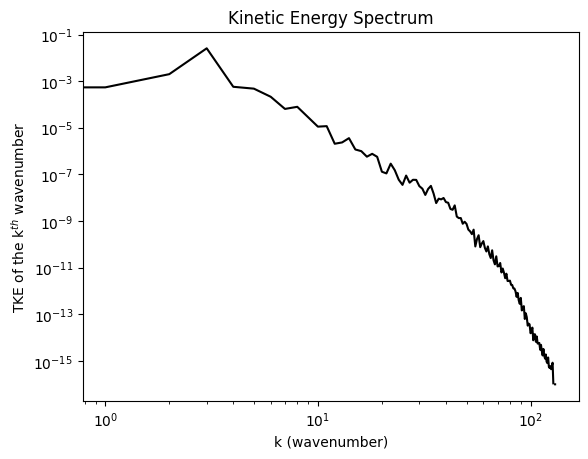

In [90]:
import h5py
f = h5py.File('../..//RBC_small/train/RBC_small_165_s2.h5','r')
w = f['tasks']['vorticity']
u = f['tasks']['u'][()]
v = f['tasks']['v'][()]
energy_specturm(u,v)

shape of data =  (1001, 2, 128, 128)
Reading files...localtime Sun Sep  3 20:30:34 2023 - END

Computing spectrum...  Sun Sep  3 20:30:34 2023
N = 128
M = 128
amplsU.shape = (128, 128)
box sidex     = 128
box sidey     = 128
sphere radius = 92
centerbox     = 64
centerboy     = 64
65
Real      Kmax    =  65
Spherical Kmax    =  92
the KE  of the mean velocity discrete  =  0.2191103841520601
the KE  of the mean velocity sphere    =  0.21911038415206024
the mean KE discrete  =  0.23993954149852778
the mean KE sphere    =  0.23993954149853705
Computing spectrum...  Sun Sep  3 20:30:34 2023 - END 



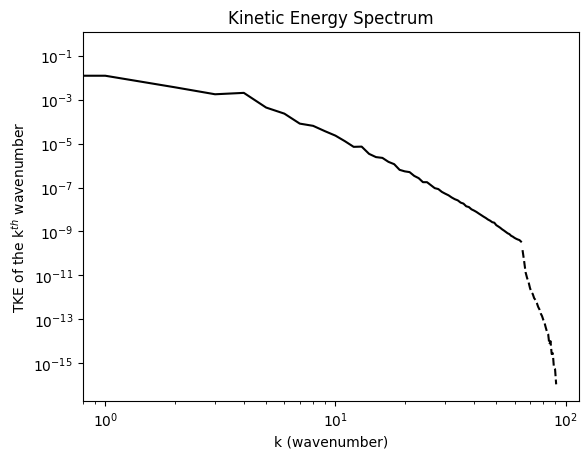

In [91]:
import h5py
def plot_energy_specturm(data_name,pred):
    data_info = {"decay_turb":['../../Decay_Turbulence_small/train/Decay_turb_small_128x128_79.h5', 0.02],
                 "burger2d": ["../../Burgers_2D_small/test/Burgers2D_128x128_79.h5",0.001],
                 "rbc": ["../../RBC_small/test/RBC_small_33_s2.h5",0.01]}
f = h5py.File('../../Burgers_2D_small/train/Burgers2D_128x128_161.h5','r')
u = f['tasks']['u'][()]
v = f['tasks']['v'][()]
energy_specturm(u,v)

shape of data =  (2000, 2, 128, 128)
Reading files...localtime Sun Sep  3 20:30:40 2023 - END

Computing spectrum...  Sun Sep  3 20:30:40 2023
N = 128
M = 128
amplsU.shape = (128, 128)
box sidex     = 128
box sidey     = 128
sphere radius = 92
centerbox     = 64
centerboy     = 64
65
Real      Kmax    =  65
Spherical Kmax    =  92
the KE  of the mean velocity discrete  =  1.5529559592884426e-19
the KE  of the mean velocity sphere    =  1.0061499972675755e-16
the mean KE discrete  =  0.13406170904636383
the mean KE sphere    =  0.13406171353928403
Computing spectrum...  Sun Sep  3 20:30:40 2023 - END 



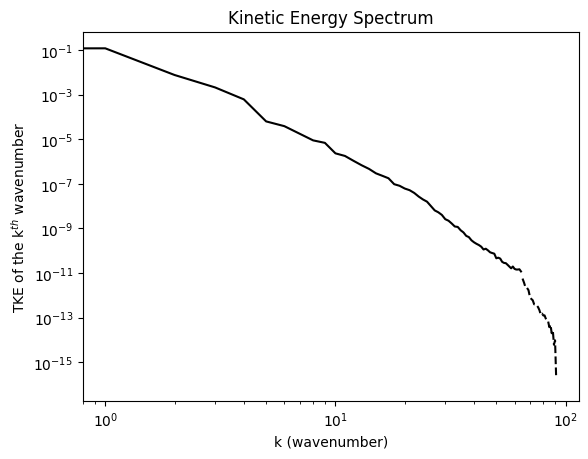

In [92]:

import h5py
f = h5py.File('../../Decay_Turbulence_small/train/Decay_turb_small_128x128_7202.h5','r')
u = f['tasks']['u'][()]
v = f['tasks']['v'][()]
energy_specturm(u,v)

# Vorticity Correlation

In [ ]:
def plot_vorticity_correlation(data_name,pred):
    data_info = {"decay_turb":['../../Decay_Turbulence_small/train/Decay_turb_small_128x128_79.h5', 0.02],
                 "burger2d": ["../../Burgers_2D_small/test/Burgers2D_128x128_79.h5",0.001],
                 "rbc": ["../../RBC_small/test/RBC_small_33_s2.h5",0.01]}
    f = h5py.File(data_info[data_name][0],'r')
    w_truth = f['tasks']['vorticity'][()]
    w_pred = pred
    for t in range(w_truth.shape[0]):
        ref_flat = reference_data[t].flatten()
        gen_flat = generative_data[t].flatten()
        corr, _ = pearsonr(ref_flat, gen_flat)
        correlations[t] = corr
    fig,axs = plt.subplots(1,1,figsize=(20,10))
    axs.plot(np.arange(0,w_truth.shape[0]),correlations)
    return None

In [118]:
def generate_test_matrix(cols:int, final_index:int):
    # Calculate the number of rows based on the final index and number of columns
    rows = (final_index + 1) // (cols - 1)
    
    # Check if an additional row is needed to reach the final index
    if (final_index + 1) % (cols - 1) != 0:
        rows += 1
    
    # Initialize a matrix filled with zeros
    matrix = np.zeros((rows, cols),dtype=int)
    
    # Fill the matrix according to the specified pattern
    current_value = 0
    for i in range(rows):
        for j in range(cols):
            if current_value <= final_index:
                matrix[i, j] = current_value
                current_value += 1
        current_value -= 1  # Repeat the last element in the next row
                
    return matrix[:-1,:]

import torch
import torchvision.transforms as transforms
from PIL import Image, ImageFilter
def get_prediction(data_name,timescale_factor = 10,num_snapshot = 10,in_channel=1,upscale_factor=4):
    data_info = {"decay_turb":['../../Decay_Turbulence_small/train/Decay_turb_small_128x128_79.h5', 0.02],
                 "burger2d": ["../../Burgers_2D_small/test/Burgers2D_128x128_79.h5",0.001],
                 "rbc": ["../../RBC_small/test/RBC_small_33_s2.h5",0.01]}

    w_truth = f['tasks']['vorticity'][()]
    u_truth = f['tasks']['u'][()]
    v_truth = f['tasks']['v'][()]
    final_index = (u_truth.shape[0]-1)//timescale_factor
    idx_matrix = generate_test_matrix(num_snapshot +1 , final_index)*timescale_factor    
    print(idx_matrix)
    if in_channel ==1:
        hr_input = w_truth[idx_matrix[:,0]]
        hr_target = w_truth[idx_matrix[:,1:]]
    elif in_channel ==2:
        hr_input = np.stack((u_truth[idx_matrix[:,0]],v_truth[idx_matrix[:,0]]),axis=1)
        hr_target = np.stack((u_truth[idx_matrix[:,1:]],v_truth[idx_matrix[:,1:]]),axis=1)
    elif in_channel ==3:
        hr_input = np.stack((w_truth[idx_matrix[:,0]],u_truth[idx_matrix[:,0]],v_truth[idx_matrix[:,0]]),axis=1)
        hr_target = np.stack((w_truth[idx_matrix[:,1:]],u_truth[idx_matrix[:,1:]],v_truth[idx_matrix[:,1:]]),axis=1)
    # to low resolution
    transform = torch.from_numpy
    img_shape_x = hr_input.shape[-2]
    img_shape_y = hr_input.shape[-1]
    input_transform = transforms.Resize((int(img_shape_x/upscale_factor),int(img_shape_y/upscale_factor)),Image.BICUBIC,antialias=False)
    
    # to tensor
    lr_input_tensor = input_transform(transform(hr_input))
    hr_target_tensor = transform(hr_target)
    lr_input_tensor = lr_input_tensor.unsqueeze(1) if in_channel ==1 else lr_input_tensor
    hr_target_tensor = hr_target_tensor.unsqueeze(2) if in_channel ==1 else hr_target_tensor.permute(0,2,1,3,4)
    lr_input = lr_input_tensor.numpy()
    # print(idx_matrix[:,0])
    return lr_input_tensor.shape,hr_target_tensor.shape
    # batch input

get_prediction("decay_turb",20,10,in_channel=3,upscale_factor=4)
# transform = torch.from_numpy
# upscale_factor = 4
# img_shape_x = 128
# img_shape_y = 128
# input_transform = transforms.Resize((int(img_shape_x/upscale_factor),int(img_shape_y/upscale_factor)),Image.BICUBIC,antialias=False)
# uv_tensor = transform(uv)
# w_lr = input_transform(uv_tensor)

# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# checkpoint = torch.load("results/PASR_MLP_small_data_Burger2D_small_crop_size_256_ode_step_8_ode_method_Euler_task_dt_4_num_snapshots_20_upscale_factor_4_timescale_factor_10_loss_type_L1_lamb_1.0_lr_0.000

[[   0   20   40   60   80  100  120  140  160  180  200]
 [ 200  220  240  260  280  300  320  340  360  380  400]
 [ 400  420  440  460  480  500  520  540  560  580  600]
 [ 600  620  640  660  680  700  720  740  760  780  800]
 [ 800  820  840  860  880  900  920  940  960  980 1000]
 [1000 1020 1040 1060 1080 1100 1120 1140 1160 1180 1200]
 [1200 1220 1240 1260 1280 1300 1320 1340 1360 1380 1400]
 [1400 1420 1440 1460 1480 1500 1520 1540 1560 1580 1600]
 [1600 1620 1640 1660 1680 1700 1720 1740 1760 1780 1800]]


(torch.Size([9, 3, 32, 32]), torch.Size([9, 10, 3, 128, 128]))

In [ ]:
import numpy as np
from scipy.stats import pearsonr
from scipy.ndimage import zoom

# Simulate your reference and generative data
reference_data = np.random.rand(1000, 256, 256)
generative_data = np.random.rand(1000, 256, 256)
generative_data = reference_data
# Rescale generative_data to match the shape of reference_data
# You can also downsample reference_data to match the shape of generative_data


# Initialize an array to store correlation values
correlations = np.zeros(1000)

# Loop through each time-step to calculate correlation
for t in range(1000):
    ref_flat = reference_data[t].flatten()
    gen_flat = generative_data[t].flatten()
    corr, _ = pearsonr(ref_flat, gen_flat)
    correlations[t] = corr

# Now, `correlations` contains the Pearson correlation coefficients for each time-step
plt.plot(correlations)

In [ ]:
f = h5py.File('rbc_321_256_s9.h5','r')
print(f['scales/sim_time'][()])
w = f['tasks']['vorticity'][()]

f.close()
f = h5py.File('RBC_small/train/RBC_small_9217_s2.h5','r')
w2 = f['tasks']['vorticity'][()]
f.close()

print(w.shape)
print(w2.shape)
import numpy as np
import matplotlib.pyplot as plt

# Generate placeholder data
u_x = w.reshape(-1)
u_y = w2.reshape(-1)

# Calculate the joint histogram
histogram2D, xedges, yedges = np.histogram2d(u_x, u_y, bins=50, density=True)

# Plotting the joint PDF using a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(histogram2D, interpolation='nearest', origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', cmap='viridis')
plt.colorbar(label='Probability Density')
plt.xlabel('u_x Velocity')
plt.ylabel('u_y Velocity')
plt.title('Joint Probability Density Function of 2D Fluid Flow Velocity')
plt.tight_layout()
plt.show()

# import seaborn as sns
# prep_data =w.reshape(w.shape[0],-1)
# prep_data_hat = w2.reshape(w2.shape[0],-1)
# f, ax = plt.subplots(1)
# sns.distplot(prep_data, hist=False, kde=True, label='Original')
# sns.distplot(prep_data_hat, hist=False, kde=True, label='New')
# ax.set_xscale('log')
# ax.set_xbound(-1e-2,1e2)
# # Plot formatting
# plt.legend()
# plt.xlabel('Data Value')
# plt.ylabel('Data Density Estimate')